# Síntese por Alocação de Polos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

### Definição

In [2]:
def place_poles(A, B, poles):
    """
    Place the poles of a system defined by its state matrix A and input matrix B.
    """
    rank_B = np.linalg.matrix_rank(B)
    unique_poles, counts = np.unique(poles, return_counts=True)
    
    for pole, count in zip(unique_poles, counts):
        if count > rank_B:
            # Adjust the repeated pole to ensure controllability
            poles[poles == pole] += 1e-6  # Adding a small perturbation
    
    sys = ctrl.StateSpace(A, B, np.eye(A.shape[0]), np.zeros((A.shape[0], B.shape[1])))
    K = ctrl.place(sys.A, sys.B, poles)
    return K

Agora, utilizando nas matrizes do problema

In [3]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [4]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, 0, (-1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [0, 0, (1/M)*(-M*g-(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [0, 0, (1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])
# u = [T,tau]
B = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 0, 0, 1, 0, 0, 0],
              [ 0, 0, 0, 1, 0, 0],
              [ 0, 0, 0, 0, 1, 0]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0]])

cont = ctrl.StateSpace(A, B, C, D)

print(cont)

A = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00  1.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.53575404e-03
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00 -9.81817877e+00  0.00000000e+00
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  5.17014925e-03  0.00000000e+00
       0.00000000e+00  0.00000000e+00]]

B = [[  0.           0.        ]
     [  0.           0.        ]
     [  0.           0.        ]
     [  0.04247186   0.        ]
     [  0.          -9.79273731]
     [  0.         -16.09553019]]

C = [[0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 1. 0.]]

D = [[0. 0.]
     [0. 0.]
     [0. 0.]]



Algumas análises do modelo

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\lti.py:118: RuntimeWarning: invalid value encountered in divide
  zeta = -real(splane_poles)/wn


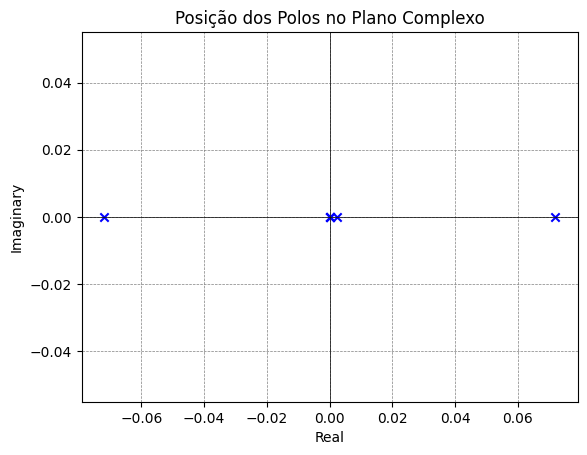

In [5]:
wn, zeta, poles = cont.damp()

# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

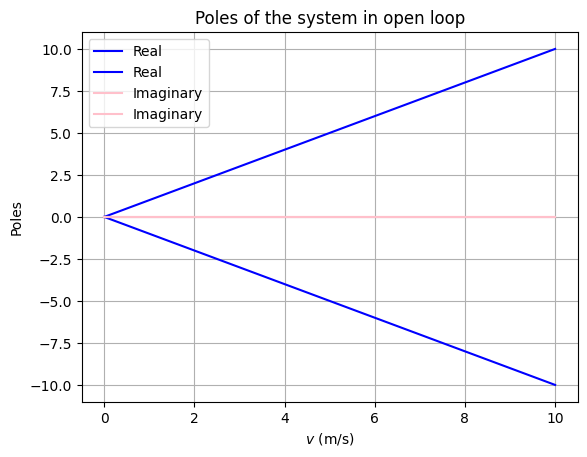

In [6]:
# Define the parameter range
v_range = np.linspace(0, 10, 1000)

def An(v):
    # Define your system matrix A here based on the parameter value v
    # Example:
    A = np.array([[v, 0], [0, -v]])
    return A

# Function to compute the eigenvalues for a given parameter value v
def eigenvalues(v):
    A = An(v)  # Assuming An(v) is defined elsewhere
    return np.linalg.eigvals(A)

# Compute the real and imaginary parts of the eigenvalues for each parameter value
Re_lambda_MA = [np.real(eigenvalues(v)) for v in v_range]
Im_lambda_MA = [np.imag(eigenvalues(v)) for v in v_range]

# Plot the real parts
plt.plot(v_range, Re_lambda_MA, color='blue', label='Real')

# Plot the imaginary parts
plt.plot(v_range, Im_lambda_MA, color='pink', label='Imaginary')

# Labeling and styling
plt.xlabel(r'$v$ (m/s)')
plt.ylabel('Poles')
plt.title('Poles of the system in open loop')
plt.legend()
plt.grid(True)
plt.show()